Ejercicio 1: Ortogonalidad
Definir una función en python que detecte si dos vectores son ortogonales

In [ ]:
import numpy as np

u = np.array([1, 0])
v = np.array([0, 5])

def son_ortogonales(u,v):
    return np.dot(u, v) == 0. #si da 0 son ortogonales

print(son_ortogonales(u, v))  # True, porque son perpendiculares

True


Ejercicio 2: Desplazamiento
Definir una función en python que reciba como parámetro las cuatro esquinas de un cuadrilátero y las desplace 5 unidades hacia arriba y 7 unidades a la izquierda

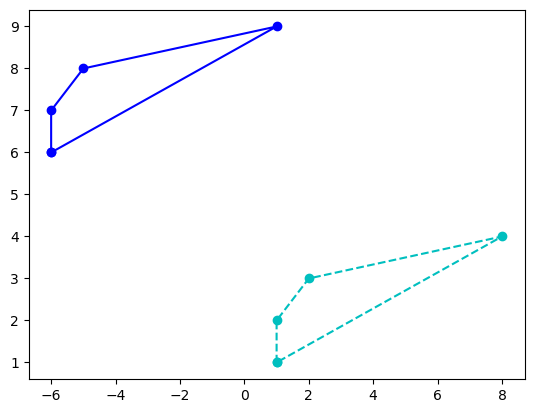

In [11]:
import matplotlib.pyplot as plt

def desplazar_puntos(a, b, c, d):
    desplazamiento = np.array([-7, 5])  # izquierda 7, arriba 5
    return a + desplazamiento, b + desplazamiento, c + desplazamiento, d + desplazamiento


# Ejecutar la siguiente celda descomentando las lineas en verde para verificar su funcionamiento.

a = np.array([1,1])
b = np.array([1,2])
c = np.array([2,3])
d = np.array([8,4])

x_coords, y_coords = zip(a,b,c,d,a)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

a_,b_,c_,d_ = desplazar_puntos(a,b,c,d)
x_coords_b, y_coords_b = zip(a_,b_,c_,d_,a_)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.show()

Ejercicio 3: Regresión lineal
El repositorio de datos del Observatorio Mundial de la Salud de la Organización Mundial de la Salud (OMS) realiza un seguimiento del estado de salud, así como de muchos otros factores relacionados, para todos los países. Usando los datos provistos por este ente, trataremos de encontrar si existe una correlación lineal entre algunos de estos factores.

In [2]:
import urllib.request

url = "https://unket.s3.sa-east-1.amazonaws.com/data/Life%20Expectancy%20Data.csv"
filename = "life_expectancy.csv"
urllib.request.urlretrieve(url, filename)

import pandas as pd
data = pd.read_csv(filename)
print(data.shape)
data.head()


(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# A continuación filtraremos la información teniendo en cuenta sólo el año 2014 y aquellos paises para los cuales hay datos acerca de:

# Producto Interno Bruto per cápita (en USD)
# Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%)

data2=data.query("Year == 2014")
data2=data2.query("GDP < 80000")
data2=data2.query("`percentage expenditure` != 0")
data2 = data2.loc[:,["Country","percentage expenditure","GDP"]] #agarra las columnas "Country", "percentage expenditure" y "GDP"
print(data2.shape)
data2.head()

(151, 3)


,Country,percentage expenditure,GDP
1,Afghanistan,73.523582,612.696514
17,Albania,428.749067,4575.763787
33,Algeria,54.237318,547.851700
49,Angola,23.965612,479.312240
65,Antigua and Barbuda,2422.999774,12888.296670


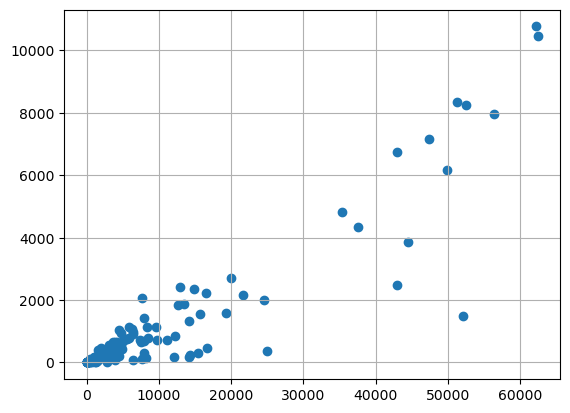

In [ ]:
# A continuación graficaremos el gasto en salud en función del pbi para
# corroborar que hay una dependencia lineal.
import matplotlib.pyplot as plt
gasto = data2.loc[:,"percentage expenditure"] #agarra todos los valores de la columna "percentage expenditure"
pbi = data2.loc[:,"GDP"] #agarra todos los valores de la columna "GDP"
plt.scatter(pbi,gasto) #poner los puntos en el plano cartesiano
plt.grid() #poner una grilla
plt.show()

In [8]:
# Paso 1
# Transformar las variables "pbi" y "gasto" en los array de numpy "x" e "y" respectivamente.
#completá con tu código aquí

import numpy as np

x = []
y = []

for i in range(len(pbi)):
    x.append(pbi.iloc[i])
    y.append(gasto.iloc[i])

x = np.array(x)
y = np.array(y)

In [12]:

# Paso 2
# # Calcular las valores óptimos de las variables  𝛽1  y  𝛽0  siguiendo las fórmulas vistas en clase.

# 𝛽1=(𝑥−𝑥¯)⋅(𝑦−𝑦¯)(𝑥−𝑥¯)⋅(𝑥−𝑥¯) 

# 𝛽0=𝑦¯−𝛽1𝑥¯ 

# Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

import numpy as np

# Sacamos el promedio de x e y
x̄ = np.mean(x)
ȳ = np.mean(y)

# Calculamos β1
β1 = np.dot(x - x̄, y - ȳ) / np.dot(x - x̄, x - x̄)
# Calculamos β0
β0 = ȳ - β1 * x̄

print(f"β1: {β1}, β0: {β0}")

β1: 0.12879552863669846, β0: -130.8009472105707


In [13]:
# Paso 3
# Calcular las predicciones del gasto usando los coeficientes obtenidos en la regresión con la fórmula  𝑦̂ =𝜷0+𝛽1 * x
# Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

y_pred = β0 + β1 * x
print("Predicciones del gasto:", y_pred)

Predicciones del gasto: [-5.18883758e+01  4.58536969e+02 -6.02400979e+01 -6.90676739e+01
  1.52915404e+03  1.44633333e+03  3.83700142e+02  7.88217309e+03
  6.47932560e+03  8.85563179e+02  3.08694658e+03 -1.07029745e+02
  1.84745583e+03  9.40575551e+02  5.97918125e+03  4.94143765e+02
 -9.25833592e+00  1.94124000e+02  5.38156501e+02  8.34877322e+02
  2.71818777e+01  4.04971090e+02  8.80673510e+02 -1.21122425e+02
 -9.05202771e+01  3.23798124e+02 -1.05210934e+02  5.48116599e+01
 -6.06803133e+01 -8.22279966e+01 -1.14572902e+02  1.77761106e+03
  8.58802562e+02  8.88407455e+02 -2.09442371e+01  8.13821890e+01
  1.60374875e+03 -1.21074322e+02  2.21439860e+02  7.90932937e+03
 -1.08272663e+02  6.76578569e+02  6.97639782e+02  3.82935035e+02
 -1.05995272e+02  2.43756933e+03 -5.72377999e+01 -6.04305736e+01
  6.29797875e+03  5.40164227e+03  1.11750642e+03  4.39719132e+02
  4.86471314e+02  5.36636078e+01  2.66068522e+03  9.72948012e+02
  3.44166537e+02 -5.84181967e+01 -4.80336414e+01 -1.25156714e+02
 

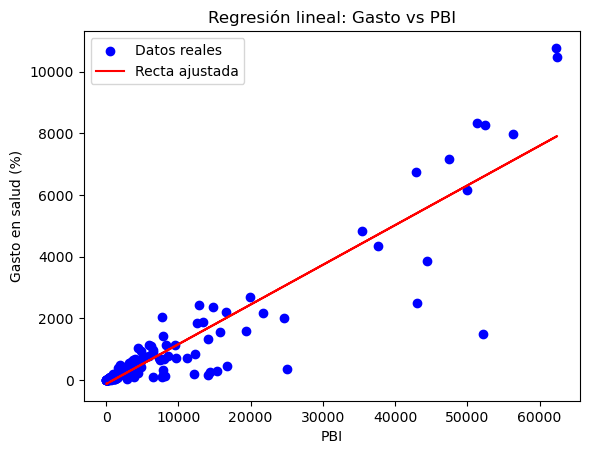

In [ ]:
# Paso 4
# Grafica los puntos  (𝑥,𝑦)  y la recta obtenida en el mismo plot para verificar su desempeño.

import matplotlib.pyplot as plt

plt.scatter(x, y, label="Datos reales", color='blue')       # puntos originales (puntos)
plt.plot(x, y_pred, label="Recta ajustada", color='red')    # recta de regresión (recta)
plt.xlabel("PBI") #titulo columna derecha
plt.ylabel("Gasto en salud (%)") #titulo columna izquierda
plt.title("Regresión lineal: Gasto vs PBI") #titulo del grafico
plt.legend() #muestra la leyenda
plt.grid() #muestra la grilla
plt.show()

Ejercicio 4: Embeddings de personalidad

El dataset MyPersonality generó mucha controversia, ya que incluye información sensible de millones de personas y no siempre fue recolectada con consentimiento. Consiste en información del perfil y de actualizaciones de la red social Facebook, apareada con puntajes de rasgos de personalidad calculadas vía un cuestionario en la app.

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. 

Los cinco factores son:

Apertura a la experiencia (openness to experience): inventivo/curioso vs. consistente/cauteloso

Escrupulosidad (conscientiousness): eficiente/organizado vs. extravagante/descuidado

Extraversión: sociable/enérgico vs. solitario/reservado

Amabilidad (agreeableness): amigable/compasivo vs. desafiante/insensible

Neuroticismo: susceptible/nervioso vs. resistente/seguro

La siguiente celda carga el dataset y lo desordena.

In [22]:
import pandas as pd

import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/mypersonality.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,7b061056ba902bf5a3f0f123fb181ad3,Back in Stockholm!,3.70,2.25,3.30,3.70,4.05,y,n,n,y,y,06/28/09 07:11 PM,1264.0,780799.0,97.97,0.01,792237.0,0.50,0.06
1,d39c2b0fb2e50e37795fdbe3b8cd3792,GO STATE!!!!!!! WOOT!!!!!!!!! SECOND YEAR IN A...,3.75,2.00,5.00,4.25,4.50,y,n,y,y,y,10/03/09 09:32 PM,775.0,290973.0,97.27,0.01,296174.0,0.50,0.08
2,37195f370c3fd7486ccedb1519b026c2,hates saying bye to *PROPNAME*=(,4.13,1.43,4.50,3.50,4.13,y,n,y,y,y,09/09/09 01:03 AM,694.0,234370.0,97.74,0.01,237664.0,0.50,0.07
3,181962441153a36333f0c60701823412,loves her Valentine. <3,3.40,2.80,3.05,3.05,4.35,n,y,n,n,y,02/14/10 09:04 AM,209.0,20582.2,95.61,0.03,21092.0,0.49,0.11
4,527ed53d2ba3a3bc417b8402d5b2f556,will do what he has to until he can do what he...,3.35,2.75,2.85,3.10,4.15,n,n,n,n,y,10/14/09 06:32 PM,789.0,303058.0,97.74,0.01,307565.0,0.50,0.07


In [24]:
# Las columnas sOPN, sCON, sEXT, sAGR y sNEU contienen los valores de las 5 componentes de la personalidad de cada usuario. 
# Almacenemos los datos de personalidad de los 5 primeros ejemplos del dataset en 5 vectores numpy.
v0 = np.array(df.loc[0,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v1 = np.array(df.loc[1,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v2 = np.array(df.loc[2,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v3 = np.array(df.loc[3,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v4 = np.array(df.loc[4,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
print("Vectores de personalidad:")
print("v0:", v0)
print("v1:", v1)        
print("v2:", v2)
print("v3:", v3)
print("v4:", v4)

Vectores de personalidad:
v0: [4.05 3.7 3.7 3.3 2.25]
v1: [4.5 4.25 3.75 5.0 2.0]
v2: [4.13 3.5 4.13 4.5 1.43]
v3: [4.35 3.05 3.4 3.05 2.8]
v4: [4.15 3.1 3.35 2.85 2.75]


In [ ]:
# Paso 1
# Encontrá un vector que describa a la personalidad promedio dentro de las 5 muestras que extrajimos del dataset.
promedio = np.mean([v0, v1, v2, v3, v4], axis=0) #np.mean calcula el promedio de los vectores
print("Vector promedio de personalidad:", promedio)


Vector promedio de personalidad: [4.236 3.5200000000000005 3.6660000000000004 3.7400000000000007 2.246]


In [ ]:
# Paso 2
# Programá una función que devuelva el ángulo entre dos vectores pasados como parámetro (investigar como se logra :) )
from scipy.spatial.distance import cosine
import numpy as np

def vector_angle(u, v):
    cos_sim = 1 - cosine(u, v)  # Devuelve un valor entre 0 y 1 que indica qué tan distintos son los vectores.
                                # Si dos vectores son idénticos, cosine = 0; si son ortogonales, cosine = 1.

    angle = np.arccos(cos_sim)  # Calcula el ángulo en radianes
    return np.degrees(angle)  # Convierte el ángulo a grados

print(vector_angle(v1, v2))  # → 6.21

6.215739000933005


In [ ]:
# Paso 3
# Podemos establecer qué tan parecidas son las personalidades en función del ángulo entre los vectores. 
# Mientras menor sea el ángulo más parecida será la dirección de los vectores y también la personalidad de las personas a las que representan. 
# Establecé cuales dos personas son más parecidas dentro de la muestra de 5 personas que extrajimos del dataset.

#completá con tu código aquí
vectores = [v0, v1, v2, v3, v4]
nombres = ["v0", "v1", "v2", "v3", "v4"]

menor_angulo = 999
par_mas_parecido = ("", "")

# Recorremos todas las combinaciones posibles sin repetir (solo una vez cada par)
for i in range(len(vectores)):
    for j in range(i + 1, len(vectores)):
        angulo = vector_angle(vectores[i], vectores[j]) # función que devuelve el ángulo entre dos vectores 
        if angulo < menor_angulo:
            menor_angulo = angulo
            par_mas_parecido = (nombres[i], nombres[j])
            print("ENTRO más parecidos son:",
                  par_mas_parecido[0], "y", par_mas_parecido[1],
                  "con un ángulo de", round(menor_angulo, 2), "grados")

# Mostramos el resultado
print("--" * 20)
print("Los vectores más parecidos son:",
      par_mas_parecido[0], "y", par_mas_parecido[1],
      "con un ángulo de", round(menor_angulo, 2), "grados")


ENTRO más parecidos son: v0 y v1 con un ángulo de 9.19 grados
ENTRO más parecidos son: v0 y v3 con un ángulo de 7.25 grados
ENTRO más parecidos son: v0 y v4 con un ángulo de 6.75 grados
ENTRO más parecidos son: v1 y v2 con un ángulo de 6.22 grados
ENTRO más parecidos son: v3 y v4 con un ángulo de 1.57 grados
----------------------------------------
Los vectores más parecidos son: v3 y v4 con un ángulo de 1.57 grados


Ejercicio 1: Suma Matrices

Complete la implementación de la función suma_matrices para que devuelva como resultado la suma entre las dos matrices (arreglos numpy) pasados como parámetro (recordá verificar que los tamaños sean compatibles).

In [31]:
import numpy as np
def suma_matrices(A, B):
  suma = np.array([A+B])
  return suma

In [33]:
#@title Ejecuta esta celda para evaluar tu función
import numpy as np
A = np.array([
    [10,20,30],
    [40,50,60]
])

B = np.array([
    [10,50,30],
    [40,20,60]
])

C = np.array([
        [ 2,  3,  5,  -8],
        [4, 13, 17, -19],
        [23, 15, 31, 0]
])

D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])

def test_suma(A,B,C,D):
  if( not (suma_matrices(A, B) == A + B).all()): raise ValueError("La suma entre A y B falla")
  try:
    suma_matrices(C, A)
    print("Tu función no contempla tamaños incompatibles a la hora de sumar" )
  except ValueError:
    print("Tu función suma_matrices está excelente")

test_suma(A,B,C,D)

Tu función suma_matrices está excelente


In [2]:
# Complete la implementación de la función producto_matrices para 
# que devuelva como resultado la multiplicación entre las dos matrices (arreglos numpy) 
# pasados como parámetro (recordá verificar que los tamaños sean compatibles).

def producto_matrices(a, b):
  producto = np.array([a.dot(b)])
  #complete con su código aquí
  return producto

In [3]:
#@title Ejecuta esta celda para evaluar tu función
import numpy as np
A = np.array([
    [10,20,30],
    [40,50,60]
])

B = np.array([
    [10,50,30],
    [40,20,60]
])

C = np.array([
        [ 2,  3,  5,  -8],
        [4, 13, 17, -19],
        [23, 15, 31, 0]
])

D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
def test_producto(A,B,C,D):
  if( not (producto_matrices(A, C) == A.dot(C)).all()): raise ValueError("La multiplicación entre A y C falla")
  try:
    producto_matrices(C, A)
    print("Tu función no contempla tamaños incompatibles a la hora de multiplicar" )
  except ValueError:
    print("Tu función producto_matrices está excelente")

test_producto(A,B,C,D)

Tu función producto_matrices está excelente
